In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# make the dataset
N = 1000
X = np.random.random((N, 2)) *6 - 3  # uniformly distrbuted between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:
                              y=cos(2x) + cos(3x)

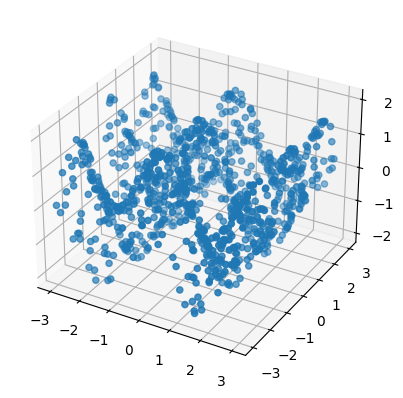

In [5]:
# plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [6]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation="relu"),
    tf.keras.layers.Dense(1)
])

In [7]:
# compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss="mse")
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0217
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9516
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9286
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8749
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8539
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7380
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6871
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6375
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6074
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5672
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6286
Epoch 13/100
32/32 [=================

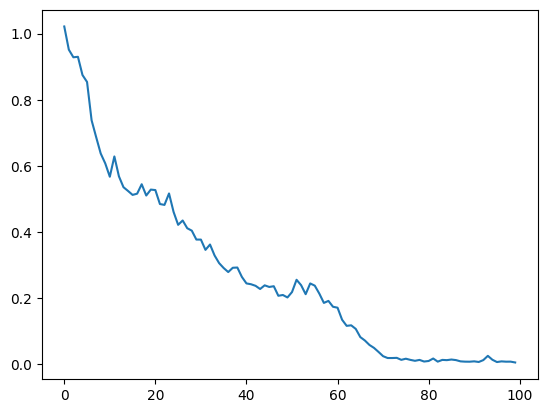

In [8]:
# plot the loss
plt.plot(r.history["loss"], label='loss')

79/79 [==============================] - 0s 2ms/step


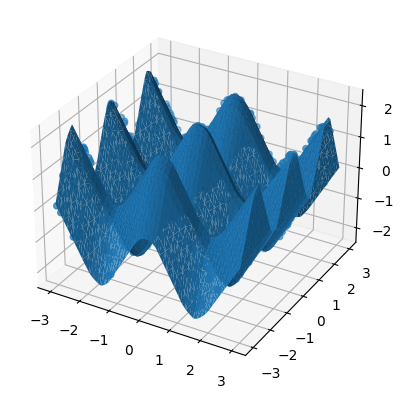

In [10]:
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()
# File => Download => Download .py to run on local machine

79/79 [==============================] - 0s 1ms/step


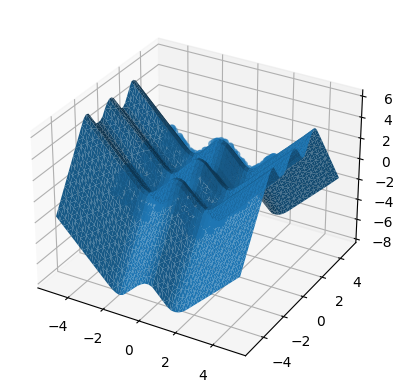

In [11]:
# can it extrapolate?
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()